In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
all_songs = pd.read_csv('all.csv')

In [5]:
all_songs

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Flowers,Miley Cyrus,0.707,0.681,0.0,-4.325,1.0,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455.0,4.0,Yes
1,Kill Bill,SZA,0.644,0.728,8.0,-5.750,1.0,0.0351,0.0543,0.169000,0.1610,0.430,88.993,audio_features,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947.0,4.0,Yes
2,Last Night,Morgan Wallen,0.517,0.675,6.0,-5.382,1.0,0.0357,0.4590,0.000000,0.1510,0.518,203.853,audio_features,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855.0,4.0,Yes
3,Unholy,Sam Smith & Kim Petras,0.719,0.454,2.0,-7.384,1.0,0.0707,0.0138,0.000005,0.3180,0.224,131.007,audio_features,spotify:track:3bXRd0yVb5sw2WVblM5URR,https://api.spotify.com/v1/tracks/3bXRd0yVb5sw...,https://api.spotify.com/v1/audio-analysis/3bXR...,156943.0,4.0,Yes
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage",0.715,0.620,1.0,-6.005,0.0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,audio_features,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,Heartbreak Hotel,Elvis Presley,0.695,0.295,9.0,-8.672,1.0,0.0609,0.8430,0.000002,0.0856,0.732,93.574,audio_features,spotify:track:1iUgrte2PxLxQ6Te95RnAV,https://api.spotify.com/v1/tracks/1iUgrte2PxLx...,https://api.spotify.com/v1/audio-analysis/1iUg...,127960.0,4.0,No
1955,Hound Dog,Elvis Presley,0.494,0.756,0.0,-8.492,1.0,0.0499,0.7330,0.005050,0.7600,0.949,86.895,audio_features,spotify:track:64Ny7djQ6rNJspquof2KoX,https://api.spotify.com/v1/tracks/64Ny7djQ6rNJ...,https://api.spotify.com/v1/audio-analysis/64Ny...,136027.0,4.0,No
1956,Johnny B. Goode,Chuck Berry,0.534,0.803,10.0,-9.129,1.0,0.0743,0.7410,0.000061,0.3070,0.969,167.983,audio_features,spotify:track:2QfiRTz5Yc8DdShCxG1tB2,https://api.spotify.com/v1/tracks/2QfiRTz5Yc8D...,https://api.spotify.com/v1/audio-analysis/2Qfi...,161560.0,4.0,No
1957,Take Five,The Dave Brubeck Quartet,0.454,0.260,8.0,-13.193,0.0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,audio_features,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133.0,5.0,No


In [6]:
X_df = all_songs.select_dtypes('number')

In [7]:
#drop unnecessary features
X_df =X_df.drop(['mode','duration_ms','time_signature'],axis=1)

In [45]:
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.707,0.681,0.0,-4.325,1.0,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455.0,4.0
1,0.644,0.728,8.0,-5.750,1.0,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947.0,4.0
2,0.517,0.675,6.0,-5.382,1.0,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855.0,4.0
3,0.719,0.454,2.0,-7.384,1.0,0.0707,0.0138,0.000005,0.3180,0.224,131.007,156943.0,4.0
4,0.715,0.620,1.0,-6.005,0.0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,0.695,0.295,9.0,-8.672,1.0,0.0609,0.8430,0.000002,0.0856,0.732,93.574,127960.0,4.0
1955,0.494,0.756,0.0,-8.492,1.0,0.0499,0.7330,0.005050,0.7600,0.949,86.895,136027.0,4.0
1956,0.534,0.803,10.0,-9.129,1.0,0.0743,0.7410,0.000061,0.3070,0.969,167.983,161560.0,4.0
1957,0.454,0.260,8.0,-13.193,0.0,0.0401,0.5390,0.000780,0.0675,0.598,174.322,324133.0,5.0


In [8]:
X_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950
...,...,...,...,...,...,...,...,...,...,...
1954,0.695,0.295,9.0,-8.672,0.0609,0.8430,0.000002,0.0856,0.732,93.574
1955,0.494,0.756,0.0,-8.492,0.0499,0.7330,0.005050,0.7600,0.949,86.895
1956,0.534,0.803,10.0,-9.129,0.0743,0.7410,0.000061,0.3070,0.969,167.983
1957,0.454,0.260,8.0,-13.193,0.0401,0.5390,0.000780,0.0675,0.598,174.322


#### First Model

In [9]:
scaler = StandardScaler()
scaler.fit(X_df)
X_scaled_np = scaler.transform(X_df)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_df.columns)
model = DBSCAN(eps=3.5,min_samples=2*X_df.shape[1]) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#model.fit(X)
#yhat = model.predict(X)
yhat = model.fit_predict(X_scaled_df)

In [10]:
X_scaled_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.083900,0.372064,-1.473657,1.275047,0.316566,-0.767080,-0.323069,-0.919250,0.613853,-0.087221
1,0.679514,0.586231,0.800831,0.880128,-0.337188,-0.797798,0.759626,-0.191036,-0.261666,-1.115537
2,-0.135677,0.344723,0.232209,0.982114,-0.324814,0.599011,-0.323102,-0.247575,0.095027,2.956460
3,1.160926,-0.662321,-0.905035,0.427286,0.396996,-0.937583,-0.323071,0.696615,-1.096652,0.373936
4,1.135251,0.094101,-1.189346,0.809458,-0.062900,0.454049,-0.323102,-0.636558,-1.307425,-0.797995
...,...,...,...,...,...,...,...,...,...,...
1954,1.006874,-1.386845,1.085142,0.070335,0.194889,1.924375,-0.323092,-0.617335,0.962439,-0.953132
1955,-0.283310,0.713820,-1.473657,0.120219,-0.031965,1.544714,-0.290748,3.195608,1.842011,-1.189915
1956,-0.026557,0.927988,1.369454,-0.056317,0.471239,1.572325,-0.322713,0.634423,1.923077,1.684803
1957,-0.540063,-1.546332,0.800831,-1.182600,-0.234072,0.875129,-0.318105,-0.719669,0.419293,1.909532


In [11]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.53


In [12]:
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
X_df['cluster'] = yhat
X_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.707,0.681,0.0,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0
1,0.644,0.728,8.0,-5.750,0.0351,0.0543,0.169000,0.1610,0.430,88.993,0
2,0.517,0.675,6.0,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,0
3,0.719,0.454,2.0,-7.384,0.0707,0.0138,0.000005,0.3180,0.224,131.007,0
4,0.715,0.620,1.0,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,0


In [14]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0], dtype=int64)

In [15]:
list(clusters)

[-1, 0]

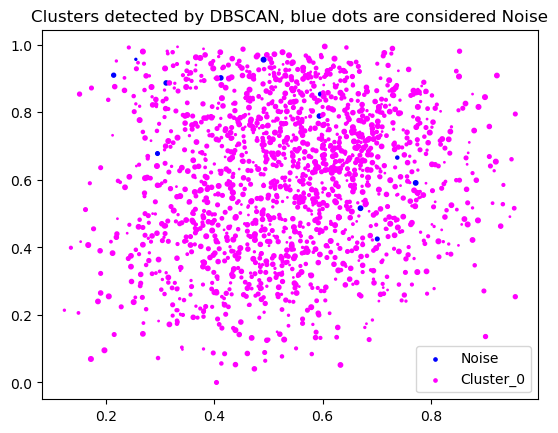

In [16]:
%matplotlib inline
#X_df['clusters'] = clusters
# create scatter plot for samples from each cluster
colors = ["b","magenta", "green"]
for index, cluster in enumerate(list(clusters)):
	# get row indexes for samples with this cluster
	#row_ix = np.where(yhat == cluster)
	#X_df[X_df['clusters'] == cluster]
	# create scatter of these samples
	#plt.scatter(X[row_ix, 0], X[row_ix, 1])
	if (cluster == -1): 
		c_label = "Noise"
	else:
		c_label = "Cluster_" + str(cluster)
	c_color = colors[index]
	plt.scatter(X_df[X_df['cluster']==cluster]['danceability'],X_df[X_df['cluster']==cluster]['energy'], 
                X_df[X_df['cluster']==cluster]['key'],
                
                color=c_color, label=c_label)
	# plt.scatter(X_df.iloc[row_ix,0],X_df.iloc[row_ix,1])

# show the plot
plt.title("Clusters detected by DBSCAN, blue dots are considered Noise")
plt.legend()
plt.show()

#### Fine Tunning

In [17]:
#step1
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)
print()

[[0.         3.08114944 4.09216325 ... 4.91556253 4.95939582 4.70214504]
 [3.08114944 0.         4.57074445 ... 4.74915553 4.91477907 3.98640695]
 [4.09216325 4.57074445 0.         ... 3.16884989 3.20273487 3.59729464]
 ...
 [4.91556253 4.74915553 3.16884989 ... 0.         3.6203308  2.36962226]
 [4.95939582 4.91477907 3.20273487 ... 3.6203308  0.         2.58670837]
 [4.70214504 3.98640695 3.59729464 ... 2.36962226 2.58670837 0.        ]]



In [18]:
#step2
d2 = np.sort(d)[:,1:]
print(d2)

[[ 1.12149787  1.13896987  1.22223053 ...  9.70734713 11.07245315
  11.29883086]
 [ 1.34714348  1.35258027  1.42855188 ... 10.11524549 11.55903003
  11.8478157 ]
 [ 1.49392382  1.63805683  1.8335436  ... 10.84325262 12.15130993
  12.2919609 ]
 ...
 [ 1.61651806  1.94534653  2.14756247 ... 10.0079057  11.05774535
  11.36170402]
 [ 1.32514556  1.36383559  1.38949328 ... 10.78039551 11.28351899
  11.77984889]
 [ 1.34945777  1.45820583  1.63199883 ... 10.62811089 11.58430922
  11.61704723]]


In [19]:
#step3
f = d2[:,25]
print(f) # The distances between every point and it's 4th nearest neighbour.

[1.65200213 1.71598067 2.30944695 ... 2.65458774 2.26414049 2.13827207]


In [20]:
#step4
f_final = np.sort(f)[::-1]
print()
print(f_final)


[8.16630097 7.89013966 6.95847906 ... 1.19378623 1.18321047 1.17215544]


C:\Users\asgar\AppData\Local\Temp\ipykernel_7540\2849469233.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


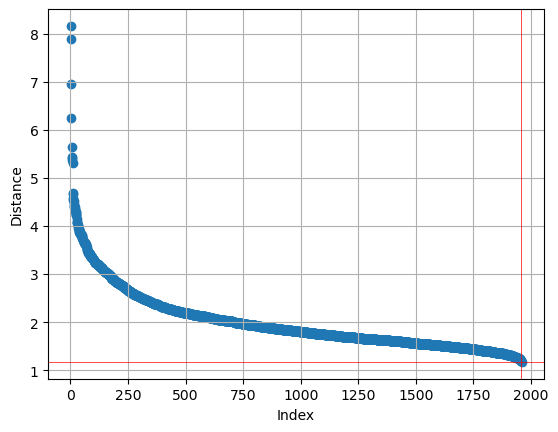

In [21]:
#step5
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

The curve is quite smooth, but it could be around 6 and 3.5. We can explore epsilon values in this range and use the Sihouette score to take the final decission 

Exploring Epsilon values

In [22]:
np.arange(3.5,6,1)

array([3.5, 4.5, 5.5])

In [ ]:
models

In [25]:
# retrieve unique clusters of one model
clusters2 = np.unique(models["model_3.5"]["yhat"])
clusters2

array([-1,  0], dtype=int64)

In [26]:
models["model_3.5"]["score"]

0.53

In [27]:
len(list(models.keys()))

2

In [28]:
list(models.items())

[('model_3.5',
  {'model': DBSCAN(eps=3.5, min_samples=4),
   'yhat': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
   'score': 0.53}),
 ('model_4.5',
  {'model': DBSCAN(eps=4.5, min_samples=4),
   'yhat': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
   'score': 0.62})]

The Silhouette Coefficient is bounded between 1 and -1. The best value is 1, the worst is -1. A higher score indicates that the model has better defined, more dense clusters. Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters.